In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn Dataset.csv')
df.drop('customerID',axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
num_col=[]
cat_col=[]
for i in df.columns:
    try:
        df[i].astype(float)
        num_col.append(i)
    except:
        cat_col.append(i)


In [4]:
num_col,cat_col

(['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges',
  'Churn'])

In [5]:
num_col.append('TotalCharges')
cat_col.remove('TotalCharges')

In [6]:
noise=[]
for i in num_col:
    for j in df[i]:
        try:
            float(j)
        except:
            noise.append(j)
noise

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [7]:
for i in num_col:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [8]:
for i in cat_col:
    if df[i].nunique() > 5:
        cat_col.remove(i)
        df.drop(i,axis=1,inplace=True)

In [9]:
for i in cat_col:
    print(i,end=": ")
    print(df[i].unique())

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\farzi\AppData\Local\Temp\ipykernel_15276\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

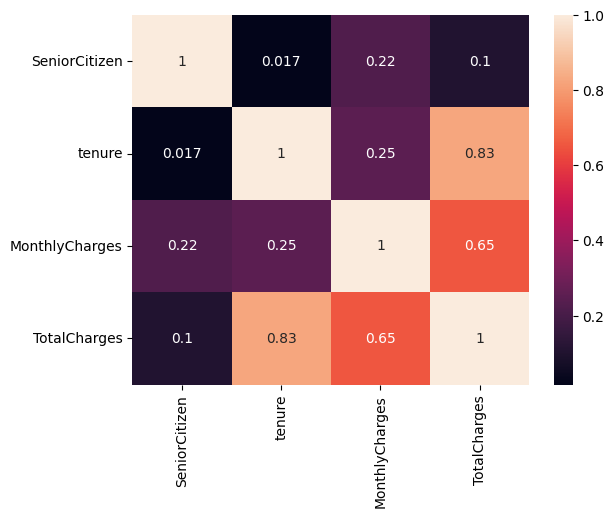

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.drop('tenure',axis=1,inplace=True)
num_col.remove('tenure')

In [12]:
df['SeniorCitizen'].unique()
num_col.remove('SeniorCitizen')

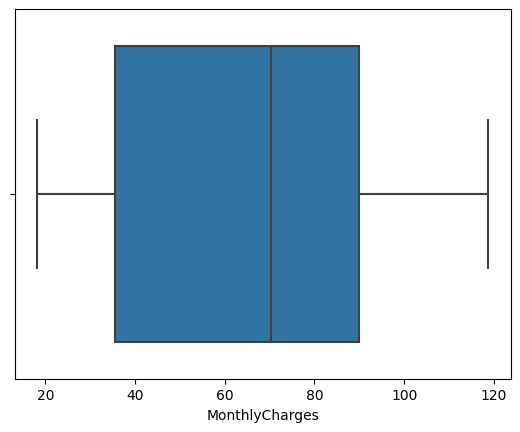

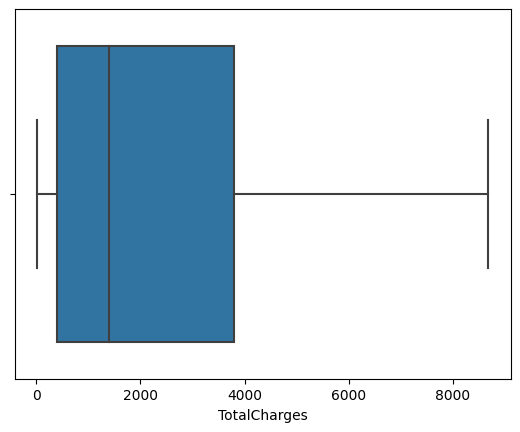

In [13]:
for i in num_col:
    sns.boxplot(df,x=df[i])
    plt.show()

In [14]:
mean_val = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_val,inplace=True)

In [15]:
desc = pd.DataFrame(index = list(df))
desc['dtypes'] = df.dtypes
desc['count'] = df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,dtypes,count,null_cnt,nunique,count,mean,std,min,25%,50%,75%,max
gender,object,7043,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,int64,7043,0,2,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,object,7043,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,object,7043,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,object,7043,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,object,7043,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,object,7043,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,object,7043,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,object,7043,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,object,7043,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler  = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
encoder  = LabelEncoder()


In [17]:
to_label_encode = []
for i in cat_col:
    if df[i].nunique()==2:
        to_label_encode.append(i)
        cat_col.remove(i)


In [18]:
df[to_label_encode] = df[to_label_encode].apply(encoder.fit_transform)
df = pd.get_dummies(df,columns=cat_col,drop_first=True)

In [19]:
x = df.drop('Churn',axis=1,inplace=False)
y = df['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [22]:
desc = pd.DataFrame(index = list(df))
desc['dtypes'] = df.dtypes
desc['count'] = df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,dtypes,count,null_cnt,nunique,count,mean,std,min,25%,50%,75%,max
gender,int32,7043,0,2,7043.0,5.047565e-01,0.500013,0.00000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,int64,7043,0,2,7043.0,1.621468e-01,0.368612,0.00000,0.000000,0.000000,0.000000,1.000000
Dependents,int32,7043,0,2,7043.0,2.995882e-01,0.458110,0.00000,0.000000,0.000000,1.000000,1.000000
PaperlessBilling,int32,7043,0,2,7043.0,5.922192e-01,0.491457,0.00000,0.000000,1.000000,1.000000,1.000000
MonthlyCharges,float64,7043,0,1585,7043.0,-6.406285e-17,1.000071,-1.54586,-0.972540,0.185733,0.833833,1.794352
TotalCharges,float64,7043,0,6531,7043.0,8.070910e-17,1.000071,-0.99985,-0.830556,-0.389763,0.663755,2.826469
Churn,int32,7043,0,2,7043.0,2.653699e-01,0.441561,0.00000,0.000000,0.000000,1.000000,1.000000
Partner_Yes,uint8,7043,0,2,7043.0,4.830328e-01,0.499748,0.00000,0.000000,0.000000,1.000000,1.000000
PhoneService_Yes,uint8,7043,0,2,7043.0,9.031663e-01,0.295752,0.00000,1.000000,1.000000,1.000000,1.000000
MultipleLines_No phone service,uint8,7043,0,2,7043.0,9.683374e-02,0.295752,0.00000,0.000000,0.000000,0.000000,1.000000
